In [17]:
import pandas as  pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
from sklearn.datasets import load_diabetes

data =load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### 1. Apply Linear Regression

In [19]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=data.data
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.20,random_state=45)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)

print("r2 score - ", r2_score(y_test,y_predict))
print("RMSE - ", np.sqrt(mean_squared_error(y_test,y_predict)))


r2 score -  0.40047885112393344
RMSE -  60.330317767430664


### 2.Apply Ridge Regression

In [20]:
from sklearn.linear_model import Ridge

r=Ridge(alpha=0.0001)
r.fit(X_train,y_train)
y_predict1=r.predict(X_test)
print("r2 score - ", r2_score(y_test,y_predict1))
print("RMSE - ", np.sqrt(mean_squared_error(y_test,y_predict1)))


r2 score -  0.4020494098439792
RMSE -  60.25124262251612


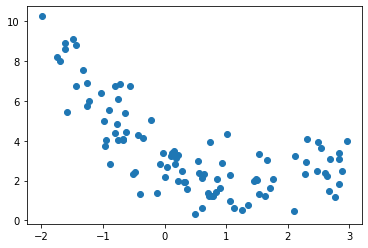

In [21]:
m=100
x1= 5 * np.random.rand(m,1)-2
x2= 0.7* x1 ** 2 - 2 * x1 + 3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

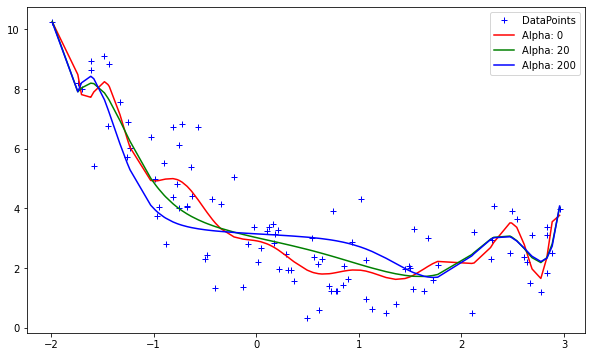

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
    model=Pipeline([
        ('poly_feats',PolynomialFeatures(degree=16)),
        ('ridge',Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0,20,200]
cs=['r','g','b']
plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='DataPoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), 
             preds[np.argsort(x1[:, 0])], c, 
             label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()



### THE END 